# Context du projet

Le Breast Cancer Wisconsin (diagnostic) Dataset est un jeu de données classique du Machine Learning. Il est composé de 569 exemples, chaque exemple étant défini par 30 caractéristiques ; ces caractéristiques correspondent principalement aux propriétés géométriques mesurées sur les cellules issues de la biopsie. Chaque exemple est classé dans la catégorie "Benign" (n=357) si la tumeur est bénigne et dans la catégorie "Malignant" (n=212) si la tumeur est maline. Le nombre de catégories de la classification est de 2, on parle alors de classification binaire. La finalité de ce travail est ainsi d'entrainer un modèle de Machine Learning à identifier le type de tumeur (bénigne ou maline) en fonction des propriétés géométriques mesurées sur les cellules issues de la biopsie.

Dans le but de tenir nos objectifs, nous allons tout d'abord construire une présentation de type Powerpoint qui décrit les concepts de base de la classification binaire selon le plan suivant :

__On quoi consiste la classification binaire ?__  
__Qu'est-ce qu'une matrice de confusion ?__  
__Qu'est-ce qu'un faux négatif ? un vrai négatif ? un faux positif ? un vrai positif ?__  
__Qu'est-ce que le taux de classification (accuracy) ?__  
__Qu'est-ce que le rappel (recall) ?__  
__Qu'est-ce que la précision (precision) ?__  
__Qu'est-ce que le F1-score ?__  
__Qu'est-ce qu'une courbe ROC ?__  
__Qu'est-ce que l'Area Under the Curve (AUC) ?__

Dans une seconde présentation de type Powerpoint, décrire :

__Qu'est-ce qu'une régression logistique ?__  
__Qu'est-ce que le Feature Scaling ?__  
__A quoi sert-il et quels sont ses avantages ?__  
__Qu'est-ce que la normalisation des données ?__  
__Qu'est-ce que la standardisation des données ?__  
__Comment l'utilise-t-on lorsque l'on a un jeu de train et un jeu de test ?__ 

Nous sommes maintenant armé.e.s pour implémenter en langage Python l'entrainement d'un modèle de type régression logistique à diagnostiquer l'absence ou la présence d'un cancer du sein. Pour cela, nous allons construire un Jupyter Notebook selon le plan suivant :

Importation des librairies Python nécessaires à la résolution du problème
Chargement des données du Breast Cancer Wisconsin (diagnostic) Dataset
Mise au format Numpy des données
NB Par défaut, ce jeu de données représente les patients malades par la valeur 0 et les patients sains par la valeur 1, ce qui est l'inverse de ce qui se fait traditionnellement en santé. Nous devons donc relabelliser les patients sains par la valeur 0 et les patients malades par la valeur 1.
Echantillonnage des données
NB test_size = 113
Afficher sous forme d'histogrammes la distribution du jeu de données initial, du jeu de train et du jeu de test en fonction de chaque catégorie (bénigne et maline)
Effectuer le Feature Scaling
Entrainer le modèle de régression logistique
NB model = LogisticRegression(C = 0.1, max_iter = 10000)
Calculer et afficher les performances obtenues sur le jeu d'apprentissage
Matrice de confusion
Taux de classification, Rappel, Précision et F1-Score
Courbe ROC, AUC
Calculer et afficher les performances obtenues sur le jeu de test
Matrice de confusion
Taux de classification, Rappel, Précision et F1-Score
Courbe ROC, AUC
Bravo, nous sommes maintenant à même de proposer un outil d'aide à la prise de décision clinique au corps médical !

# Préparation

In [1]:
# These are my default settings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams["figure.figsize"] = (12, 6)
sns.set()

pd.set_option("display.max_columns", None)

# import IPython
# def display(*dfs, head=True):
#     for df in dfs:
#         IPython.display.display(df.head() if head else df)

In [2]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
t = dataset["target"]
t

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [4]:
X = dataset.data
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
df_target = pd.DataFrame(data=t, columns=["target"])
df_target

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [6]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
dataset.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
df_X = pd.DataFrame(data=X, columns=dataset.feature_names)
df_X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
df = pd.concat([df_target, df_X], axis=1)
df

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
# exchange 0 to 1
df.target = np.logical_not(df.target).astype(int)
df

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Analyze pre-modeling

In [12]:
import ipywidgets as widgets

def bar_plot(a):
    df[a].value_counts(normalize=True).plot(kind='bar')
    plt.ylabel('proportion')
    plt.title('Distribution of '+ str(a))
    plt.xticks(rotation=90)
    return plt.show()

categorial_columns =  df.nunique().keys().tolist()
widgets.interact(bar_plot, a = categorial_columns)

interactive(children=(Dropdown(description='a', options=('target', 'mean radius', 'mean texture', 'mean perime…

<function __main__.bar_plot(a)>

## multivariate analysis

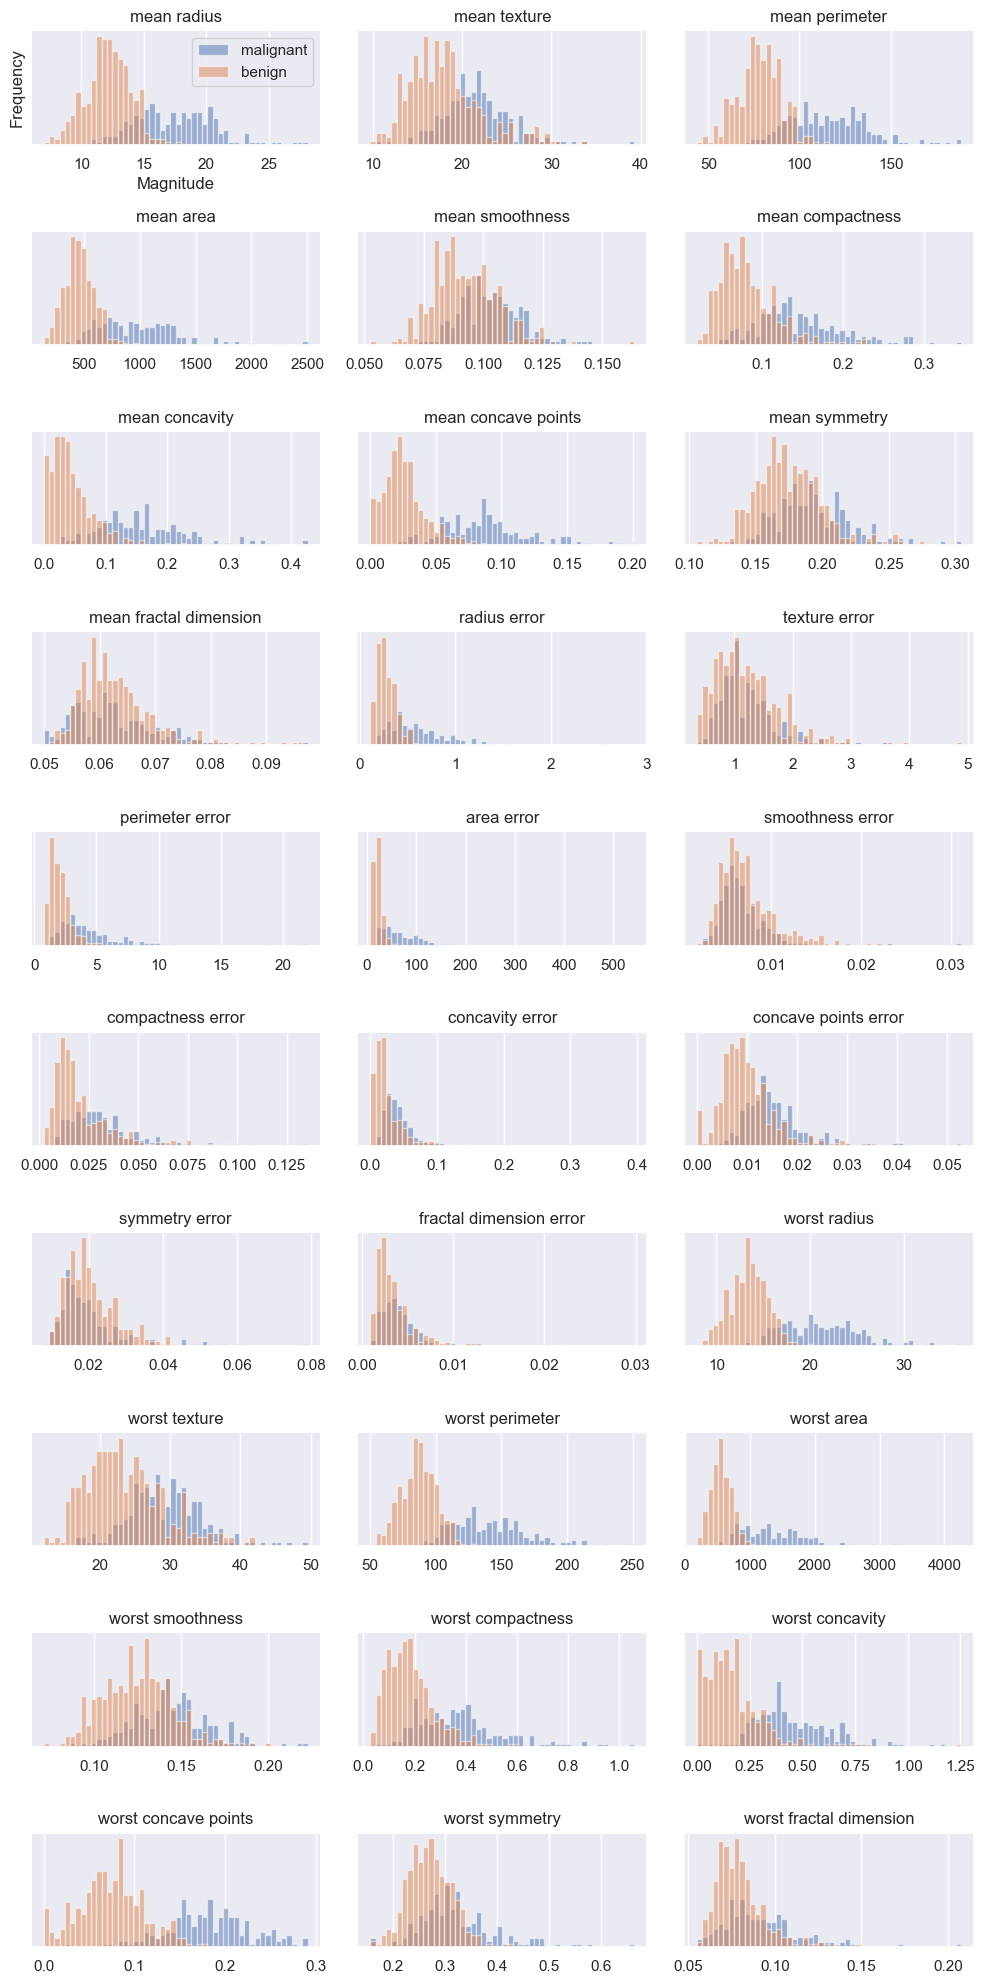

In [13]:
# visualyze coeficiency

fig, axes = plt.subplots(10, 3, figsize=(10,20))

malignant = df[df["target"]==1]
benign = df[df["target"]==0]

ax = axes.ravel() # transform multiple variable to 1 dimention. easy to display sevral graphs

for i in range(30):
    _, bins = np.histogram(df.iloc[:, i+1], bins=50)
    ax[i].hist(malignant.iloc[:, i+1].values, bins=bins, alpha=0.5)
    ax[i].hist(benign.iloc[:, i+1].values, bins=bins, alpha=0.5)
    ax[i].set_title(df.columns[i+1])
    ax[i].set_yticks([]) # undisplay yticks
ax[0].set_xlabel("Magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant","benign"], loc="best") 

fig.tight_layout()


we can use mean radius, mean perimeter, worst concave points, 

## Split and Feature Scaling

In [14]:
df

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [16]:
y = df["target"]
X = df.iloc[:,1:]
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=113, random_state=42, stratify=y)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(456, 30) (456,) (113, 30) (113,)


In [34]:
# Standalization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)

X_test_std = sc.transform(X_test)
X_train_std

array([[ 0.24862693, -0.08153   ,  0.20559672, ..., -0.05118362,
        -1.00328378, -0.80491771],
       [-0.24124207,  0.50240039, -0.28163355, ..., -0.88845461,
        -0.43900594, -0.96818424],
       [ 1.20317167, -0.20999468,  1.17195026, ...,  0.73122858,
         1.242701  ,  0.0913935 ],
       ...,
       [-0.32521961,  1.33391726, -0.38824051, ..., -0.84243918,
        -0.96513542, -1.17061268],
       [ 0.01069056,  0.25948535,  0.00900214, ...,  0.27706978,
        -0.60272599, -0.30629289],
       [ 2.19690592,  0.5794792 ,  2.22991282, ...,  1.91533901,
        -0.27369637,  0.08863562]])

## Compare

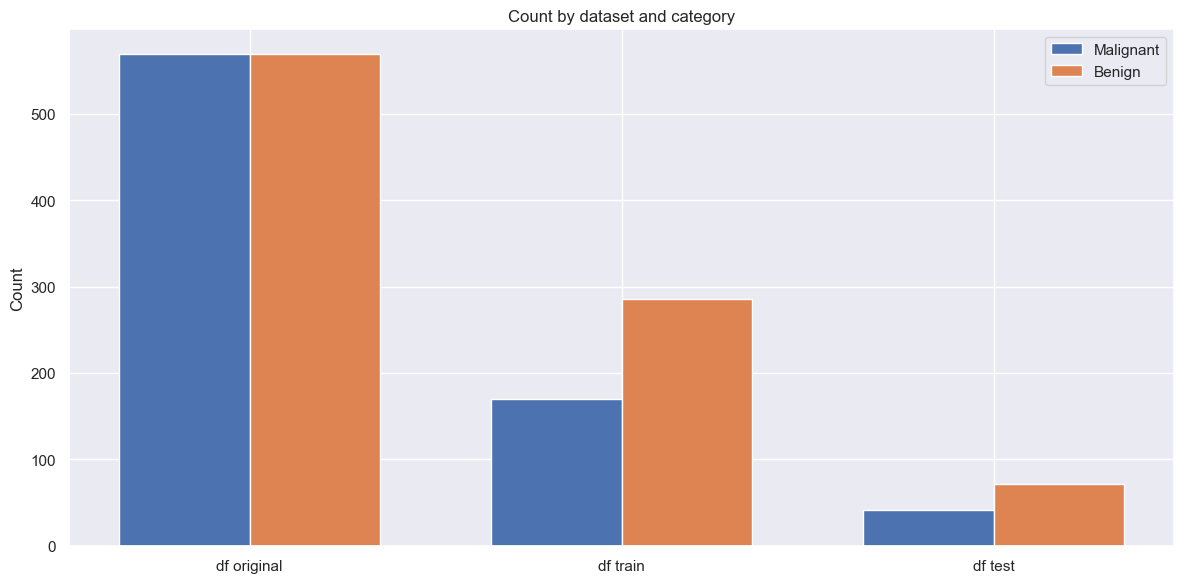

In [99]:
# "malignant","benign"

df_malignant = len(df["target"]==1)
df_benign = len(df["target"]==0)

train_malignant = len(y_train[y_train==1])
train_benign = len(y_train[y_train==0])

test_malignant = len(y_test[y_test==1])
test_benign = len(y_test[y_test==0])

labels = ["df original", "df train", "df test"]
malignant_counts = [df_malignant, train_malignant, test_malignant]
benign_counts = [df_benign, train_benign, test_benign]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, malignant_counts, width, label='Malignant')
rects2 = ax.bar(x + width/2, benign_counts, width, label='Benign')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Count by dataset and category')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


# Logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [36]:
log = LogisticRegression(C = 0.1, max_iter = 10000)
log.fit(X_train_std, y_train)

LogisticRegression(C=0.1, max_iter=10000)

In [37]:
print('Train score: {:.3f}'.format(log.score(X_train_std, y_train)))
print('Test score: {:.3f}'.format(log.score(X_test_std, y_test)))
print('Confusion matrix:\n{}'.format(confusion_matrix(y_true=y_test, y_pred=log.predict(X_test_std))))

Train score: 0.980
Test score: 0.982
Confusion matrix:
[[71  0]
 [ 2 40]]


In [53]:
# confusion matrix of train model
y_pred = log.predict(X_train_std)
cm_train = confusion_matrix(y_true=y_train, y_pred=y_pred)

<Axes: >

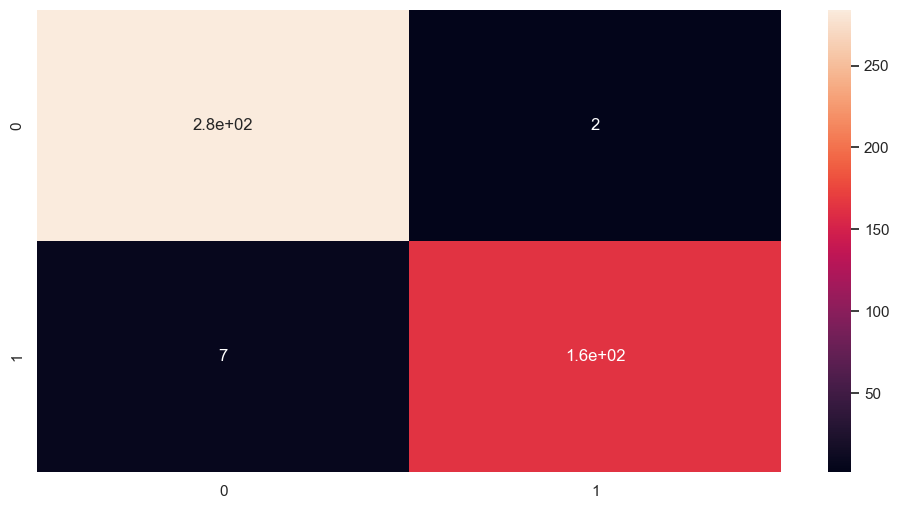

In [49]:
sns.heatmap(cm_train, annot=True)

## logistic CV

In [21]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix

In [29]:
logCV = LogisticRegressionCV(cv=10, random_state=42)
logCV.fit(X_train_std, y_train)

LogisticRegressionCV(cv=10, random_state=42)

In [30]:
print('Train score: {:.3f}'.format(logCV.score(X_train_std, y_train)))
print('Test score: {:.3f}'.format(logCV.score(X_test_std, y_test)))
print('Confusion matrix:\n{}'.format(confusion_matrix(y_true=y_test, y_pred=log.predict(X_test_std))))

Train score: 0.987
Test score: 0.982
Confusion matrix:
[[71  0]
 [ 2 40]]


## confusion matrix

<Axes: >

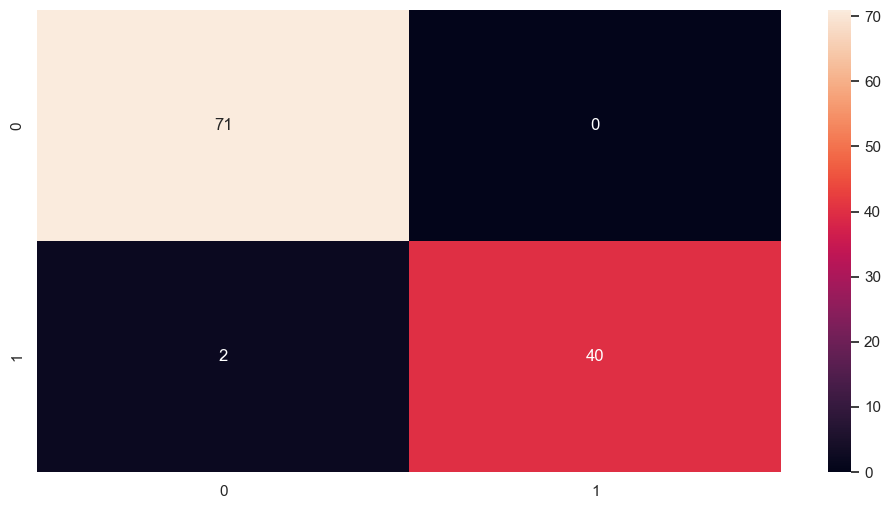

In [50]:
y_pred2 = log.predict(X_test_std)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred2)
sns.heatmap(cm, annot=True)

# scoring

In [55]:
# from scratch
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("Train scores:\n")
print('Accuracy: %.3f' % accuracy_score(y_train, y_pred))
print('Precision: %.3f' % precision_score(y_train, y_pred))
print('Recall: %.3f' % recall_score(y_train, y_pred))
print('F1: %.3f' % f1_score(y_train, y_pred))

print("-----------------------------------------")

print("Test scores:\n")
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred2))
print('Precision: %.3f' % precision_score(y_test, y_pred2))
print('Recall: %.3f' % recall_score(y_test, y_pred2))
print('F1: %.3f' % f1_score(y_test, y_pred2))

Train scores:

Accuracy: 0.980
Precision: 0.988
Recall: 0.959
F1: 0.973
-----------------------------------------
Test scores:

Accuracy: 0.982
Precision: 1.000
Recall: 0.952
F1: 0.976


In [58]:
from sklearn.metrics import classification_report

cr_train = classification_report(y_train, y_pred)
cr_test = classification_report(y_test, y_pred2)

print(cr_train, "\n", cr_test)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       286
           1       0.99      0.96      0.97       170

    accuracy                           0.98       456
   macro avg       0.98      0.98      0.98       456
weighted avg       0.98      0.98      0.98       456
 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        42

    accuracy                           0.98       113
   macro avg       0.99      0.98      0.98       113
weighted avg       0.98      0.98      0.98       113



# ROC, AUC

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

In [87]:
y_scores = log.predict_proba(X_train_std)[:,1]
y_scores2 = log.predict_proba(X_test_std)[:,1]

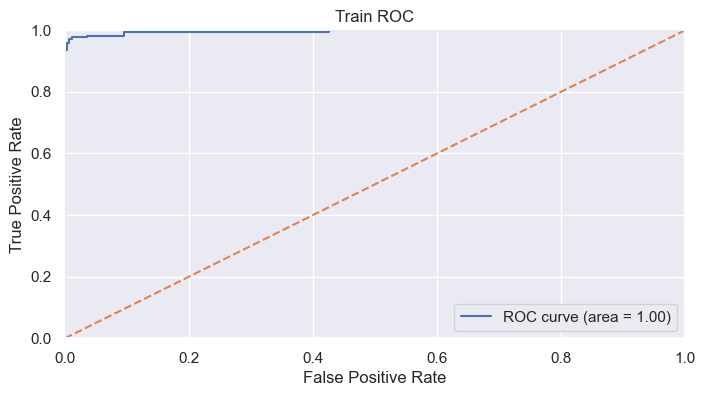

In [86]:
# Roc train

plt.subplots(1, figsize=(8,4))
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%roc_auc_score(y_train, y_scores))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train ROC')
plt.legend(loc="lower right")
plt.show()

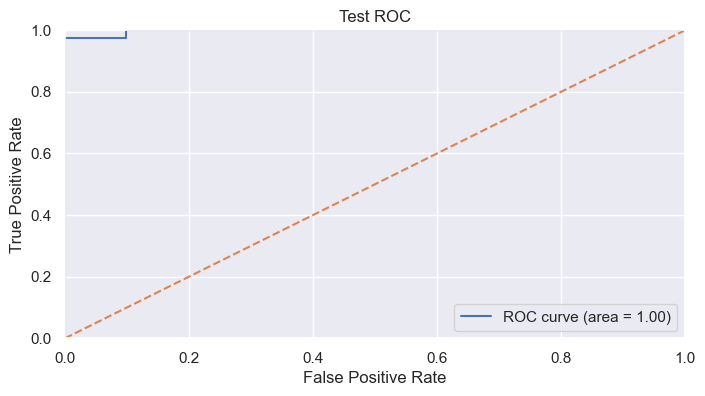

In [88]:

plt.subplots(1, figsize=(8,4))
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_scores2)
plt.plot(fpr2, tpr2, label='ROC curve (area = %.2f)'%roc_auc_score(y_test, y_scores2))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC')
plt.legend(loc="lower right")
plt.show()

# EXTRAAA

## PCA

before you start pca analysis, you need to do train_test_split and feature scaling if you need.

In [103]:
X_train_std

array([[ 0.24862693, -0.08153   ,  0.20559672, ..., -0.05118362,
        -1.00328378, -0.80491771],
       [-0.24124207,  0.50240039, -0.28163355, ..., -0.88845461,
        -0.43900594, -0.96818424],
       [ 1.20317167, -0.20999468,  1.17195026, ...,  0.73122858,
         1.242701  ,  0.0913935 ],
       ...,
       [-0.32521961,  1.33391726, -0.38824051, ..., -0.84243918,
        -0.96513542, -1.17061268],
       [ 0.01069056,  0.25948535,  0.00900214, ...,  0.27706978,
        -0.60272599, -0.30629289],
       [ 2.19690592,  0.5794792 ,  2.22991282, ...,  1.91533901,
        -0.27369637,  0.08863562]])

In [104]:
df_std = pd.DataFrame(data=X_train_std, columns=dataset.feature_names)
df_std.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,456.000000,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02
mean,-1.402387e-16,-1.480297e-16,2.726864e-17,3.233281e-16,-3.691005e-16,-6.427607e-17,2.386006e-16,1.811417e-16,-2.843729e-16,-7.654696e-16,0.000000,-7.791039e-18,1.714029e-16,1.558208e-17,-7.401487e-17,7.791039e-18,1.168656e-16,1.090745e-16,3.817609e-16,1.012835e-16,2.804774e-16,1.012835e-16,4.518802e-16,9.544022e-17,1.137492e-15,4.285071e-17,-2.970334e-17,3.311191e-17,1.752984e-16,2.454177e-16
std,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00,1.001098e+00
min,-2.010089e+00,-2.267765e+00,-1.961808e+00,-1.433260e+00,-2.344788e+00,-1.570416e+00,-1.093825e+00,-1.235619e+00,-2.735539e+00,-1.793962e+00,-1.032570,-1.553635e+00,-1.014136e+00,-7.125586e-01,-1.818817e+00,-1.311500e+00,-1.011770e+00,-1.862116e+00,-1.509640e+00,-1.093336e+00,-1.719861e+00,-2.288066e+00,-1.682437e+00,-1.211950e+00,-2.600246e+00,-1.443706e+00,-1.301020e+00,-1.729922e+00,-2.142966e+00,-1.604703e+00
25%,-6.863230e-01,-7.197659e-01,-6.866792e-01,-6.634350e-01,-7.614356e-01,-7.458435e-01,-7.314577e-01,-7.387044e-01,-7.055579e-01,-7.313145e-01,-0.612460,-6.838417e-01,-6.116121e-01,-4.838055e-01,-6.374904e-01,-6.976327e-01,-5.360369e-01,-6.559773e-01,-6.510663e-01,-5.884470e-01,-6.784829e-01,-7.254446e-01,-6.935764e-01,-6.431278e-01,-7.457877e-01,-6.814141e-01,-7.352990e-01,-7.691068e-01,-6.361058e-01,-7.016351e-01
50%,-2.356436e-01,-1.200694e-01,-2.451521e-01,-3.134766e-01,-4.007604e-02,-2.139583e-01,-3.622203e-01,-3.951237e-01,-5.846174e-02,-1.980158e-01,-0.288987,-1.495260e-01,-2.821888e-01,-3.392819e-01,-2.202520e-01,-2.906339e-01,-1.945354e-01,-1.245499e-01,-2.061457e-01,-2.408942e-01,-2.921817e-01,-6.940720e-02,-2.986918e-01,-3.573620e-01,-4.271094e-02,-2.443862e-01,-2.151756e-01,-2.228047e-01,-1.441509e-01,-2.230049e-01
75%,4.844639e-01,5.619613e-01,4.950164e-01,3.758774e-01,6.246103e-01,4.919688e-01,5.272613e-01,6.330943e-01,5.026566e-01,5.266959e-01,0.253731,4.683870e-01,2.211426e-01,8.631730e-02,4.012173e-01,3.822007e-01,2.659587e-01,4.442819e-01,3.080585e-01,2.777220e-01,5.800618e-01,7.044861e-01,5.609828e-01,3.990893e-01,6.166236e-01,5.195822e-01,5.205338e-01,6.945062e-01,4.352274e-01,4.384728e-01
max,3.904449e+00,4.638963e+00,3.904007e+00,5.119773e+00,4.714180e+00,4.490054e+00,4.141739e+00,3.842687e+00,4.432295e+00,4.986295e+00,8.498201,6.651598e+00,8.994955e+00,1.037306e+01,8.508403e+00,4.610695e+00,1.149548e+01,6.549264e+00,7.053562e+00,9.928287e+00,4.025602e+00,3.896487e+00,4.202802e+00,5.787139e+00,3.862086e+00,5.077453e+00,4.614896e+00,2.631801e+00,5.920644e+00,6.804627e+00


In [105]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
pca.fit(X_train_std)

PCA(n_components=30)

In [106]:
print(pca.explained_variance_ratio_)

[4.45744318e-01 1.85506310e-01 9.58998338e-02 6.59146900e-02
 5.61770589e-02 3.98632521e-02 2.21291414e-02 1.61415603e-02
 1.29126856e-02 1.16718602e-02 1.00827394e-02 9.04892940e-03
 8.00349369e-03 4.79583697e-03 3.04022695e-03 2.54193706e-03
 1.97378984e-03 1.74372213e-03 1.57274838e-03 1.05117715e-03
 9.98005055e-04 7.98272320e-04 7.87395580e-04 5.35413540e-04
 5.11586438e-04 2.64026944e-04 2.10287946e-04 5.02972081e-05
 2.52796824e-05 4.12382027e-06]


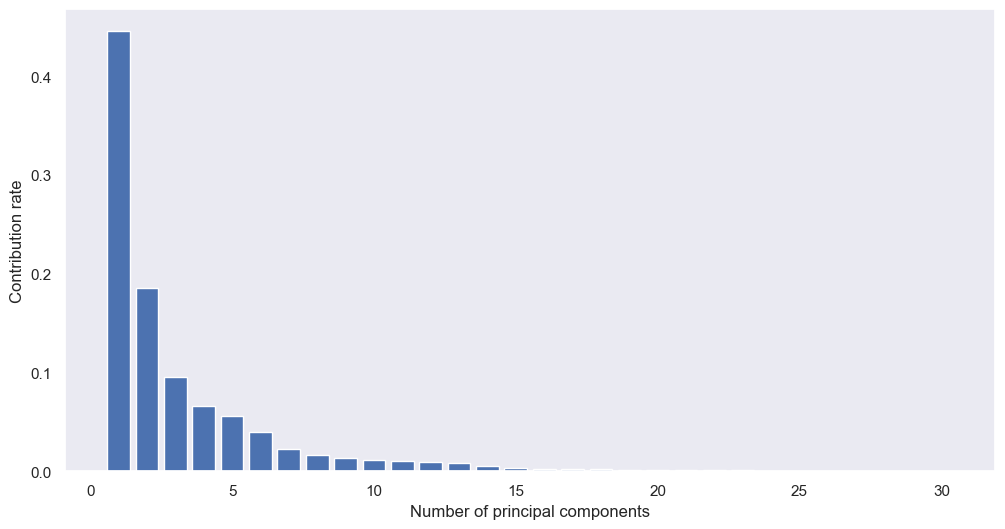

In [107]:
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
plt.ylabel("Contribution rate")
plt.xlabel("Number of principal components")
plt.grid()


In [110]:
# redemention to 5
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_std)
X_train_pca

array([[-0.79778868, -1.87733902, -0.31465358, -0.29799225,  0.64661753],
       [-2.48748504, -1.12735543,  0.34494282, -1.21583615, -0.17437028],
       [ 3.15858654, -1.62978964,  0.10475904,  0.47308605, -1.23167196],
       ...,
       [-3.17936508, -1.99806296,  0.00896468, -1.81334343, -0.31103234],
       [-0.56469101, -0.91042216, -0.3119398 , -0.53480402,  1.39756914],
       [ 6.99067069, -3.62914001, -0.30716236,  1.20106023,  0.45121659]])

In [111]:
print(pca.explained_variance_ratio_)

[0.44574432 0.18550631 0.09589983 0.06591469 0.05617706]


In [113]:

df_pca = pd.DataFrame(X_train_pca, columns=["PC{}".format(x+1) for x in range(5)])
df_pca['Outcome'] = y_train.values 
df_pca

,PC1,PC2,PC3,PC4,PC5,Outcome
0,-0.797789,-1.877339,-0.314654,-0.297992,0.646618,1
1,-2.487485,-1.127355,0.344943,-1.215836,-0.174370,0
2,3.158587,-1.629790,0.104759,0.473086,-1.231672,1
3,-3.429931,-0.393073,-0.080277,0.640308,-0.064055,0
4,-3.028154,-0.569735,0.324830,0.658096,-0.736733,0
...,...,...,...,...,...,...
451,-3.729046,-1.375259,1.717115,-0.555347,0.052858,0
452,-1.894182,0.938102,0.078923,-0.460869,-1.349383,0
453,-3.179365,-1.998063,0.008965,-1.813343,-0.311032,0
454,-0.564691,-0.910422,-0.311940,-0.534804,1.397569,0


Text(0, 0.5, 'PC 2')

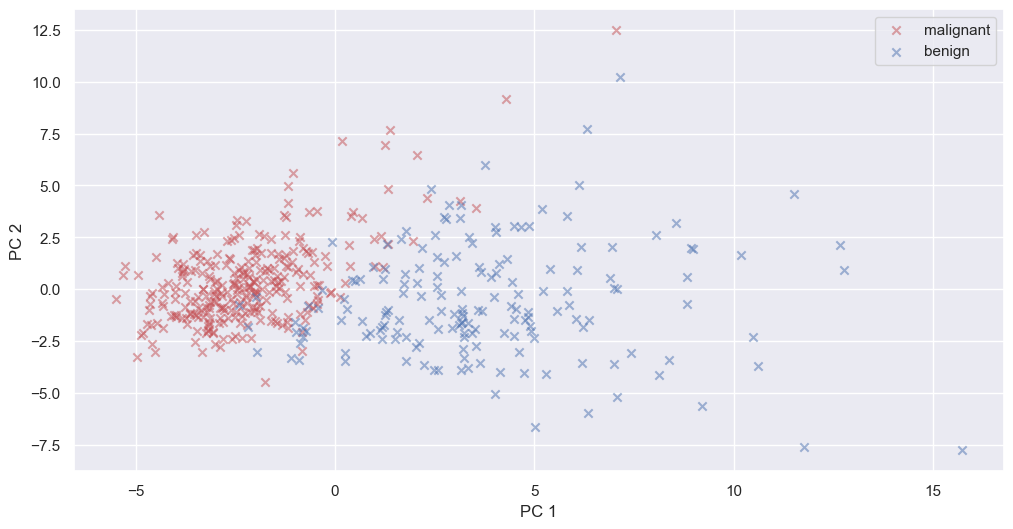

In [114]:
m = df_pca[df_pca['Outcome'] == 0]
b = df_pca[df_pca['Outcome'] == 1]
plt.scatter(x=m['PC1'], y=m['PC2'], label='malignant', c='r', marker='x', alpha=0.5)
plt.scatter(x=b['PC1'], y=b['PC2'], label='benign', c='b', marker='x', alpha=0.5)
plt.legend()
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [115]:
from sklearn.cluster import KMeans
# 2clusters, malignant and benign

model = KMeans(n_clusters=2)

y_pred = model.fit_predict(X_train_pca)
df_pca['Outcome_pred'] = y_pred
df_pca

,PC1,PC2,PC3,PC4,PC5,Outcome,Outcome_pred
0,-0.797789,-1.877339,-0.314654,-0.297992,0.646618,1,0
1,-2.487485,-1.127355,0.344943,-1.215836,-0.174370,0,0
2,3.158587,-1.629790,0.104759,0.473086,-1.231672,1,1
3,-3.429931,-0.393073,-0.080277,0.640308,-0.064055,0,0
4,-3.028154,-0.569735,0.324830,0.658096,-0.736733,0,0
...,...,...,...,...,...,...,...
451,-3.729046,-1.375259,1.717115,-0.555347,0.052858,0,0
452,-1.894182,0.938102,0.078923,-0.460869,-1.349383,0,0
453,-3.179365,-1.998063,0.008965,-1.813343,-0.311032,0,0
454,-0.564691,-0.910422,-0.311940,-0.534804,1.397569,0,0


In [117]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(df_pca['Outcome'].values, df_pca['Outcome_pred'].values)
confusion_matrix


array([[271,  15],
       [ 27, 143]], dtype=int64)